In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np

In [53]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, roc_auc_score,accuracy_score

In [2]:
red_wine_df = pd.read_csv('winequality-red.csv', sep=';')
red_wine_df['color'] = 'red'

In [7]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
red_wine_df.shape

(1599, 13)

In [3]:
white_wine_df = pd.read_csv('winequality-white.csv', sep=';')
white_wine_df['color'] = 'white'

In [10]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [11]:
white_wine_df.shape

(4898, 13)

In [4]:
wine_df = pd.concat([red_wine_df, white_wine_df])

In [6]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
wine_df.describe()

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [12]:
wine_df.shape

(6497, 13)

In [14]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [15]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [18]:
le = LabelEncoder()
wine_df['color'] = le.fit_transform(wine_df['color'])

In [21]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


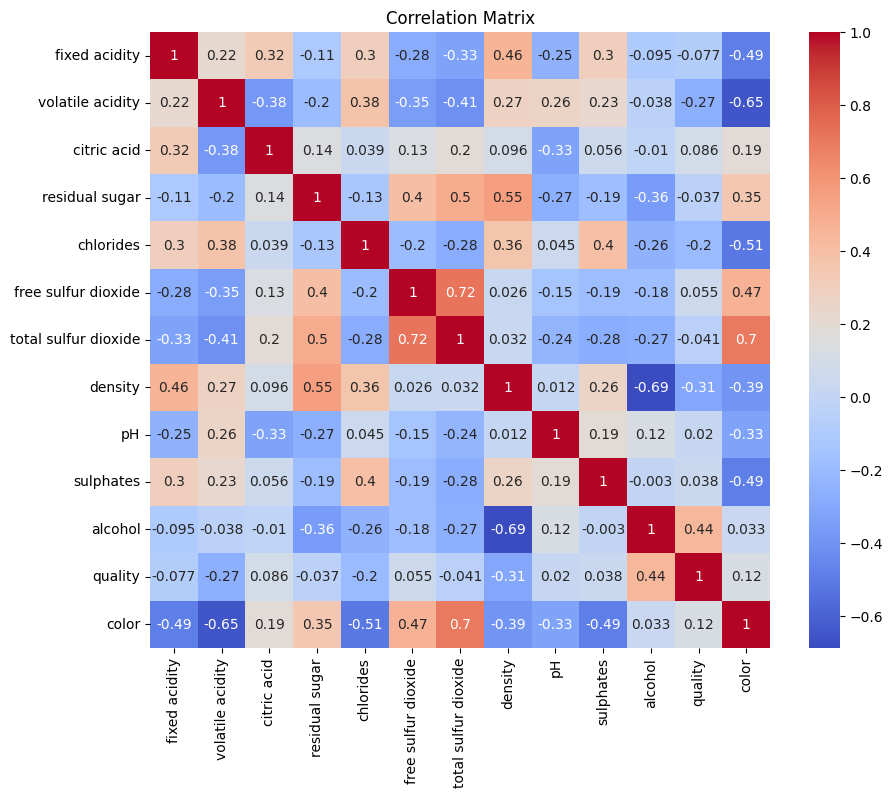

In [19]:
corr_matrix = wine_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

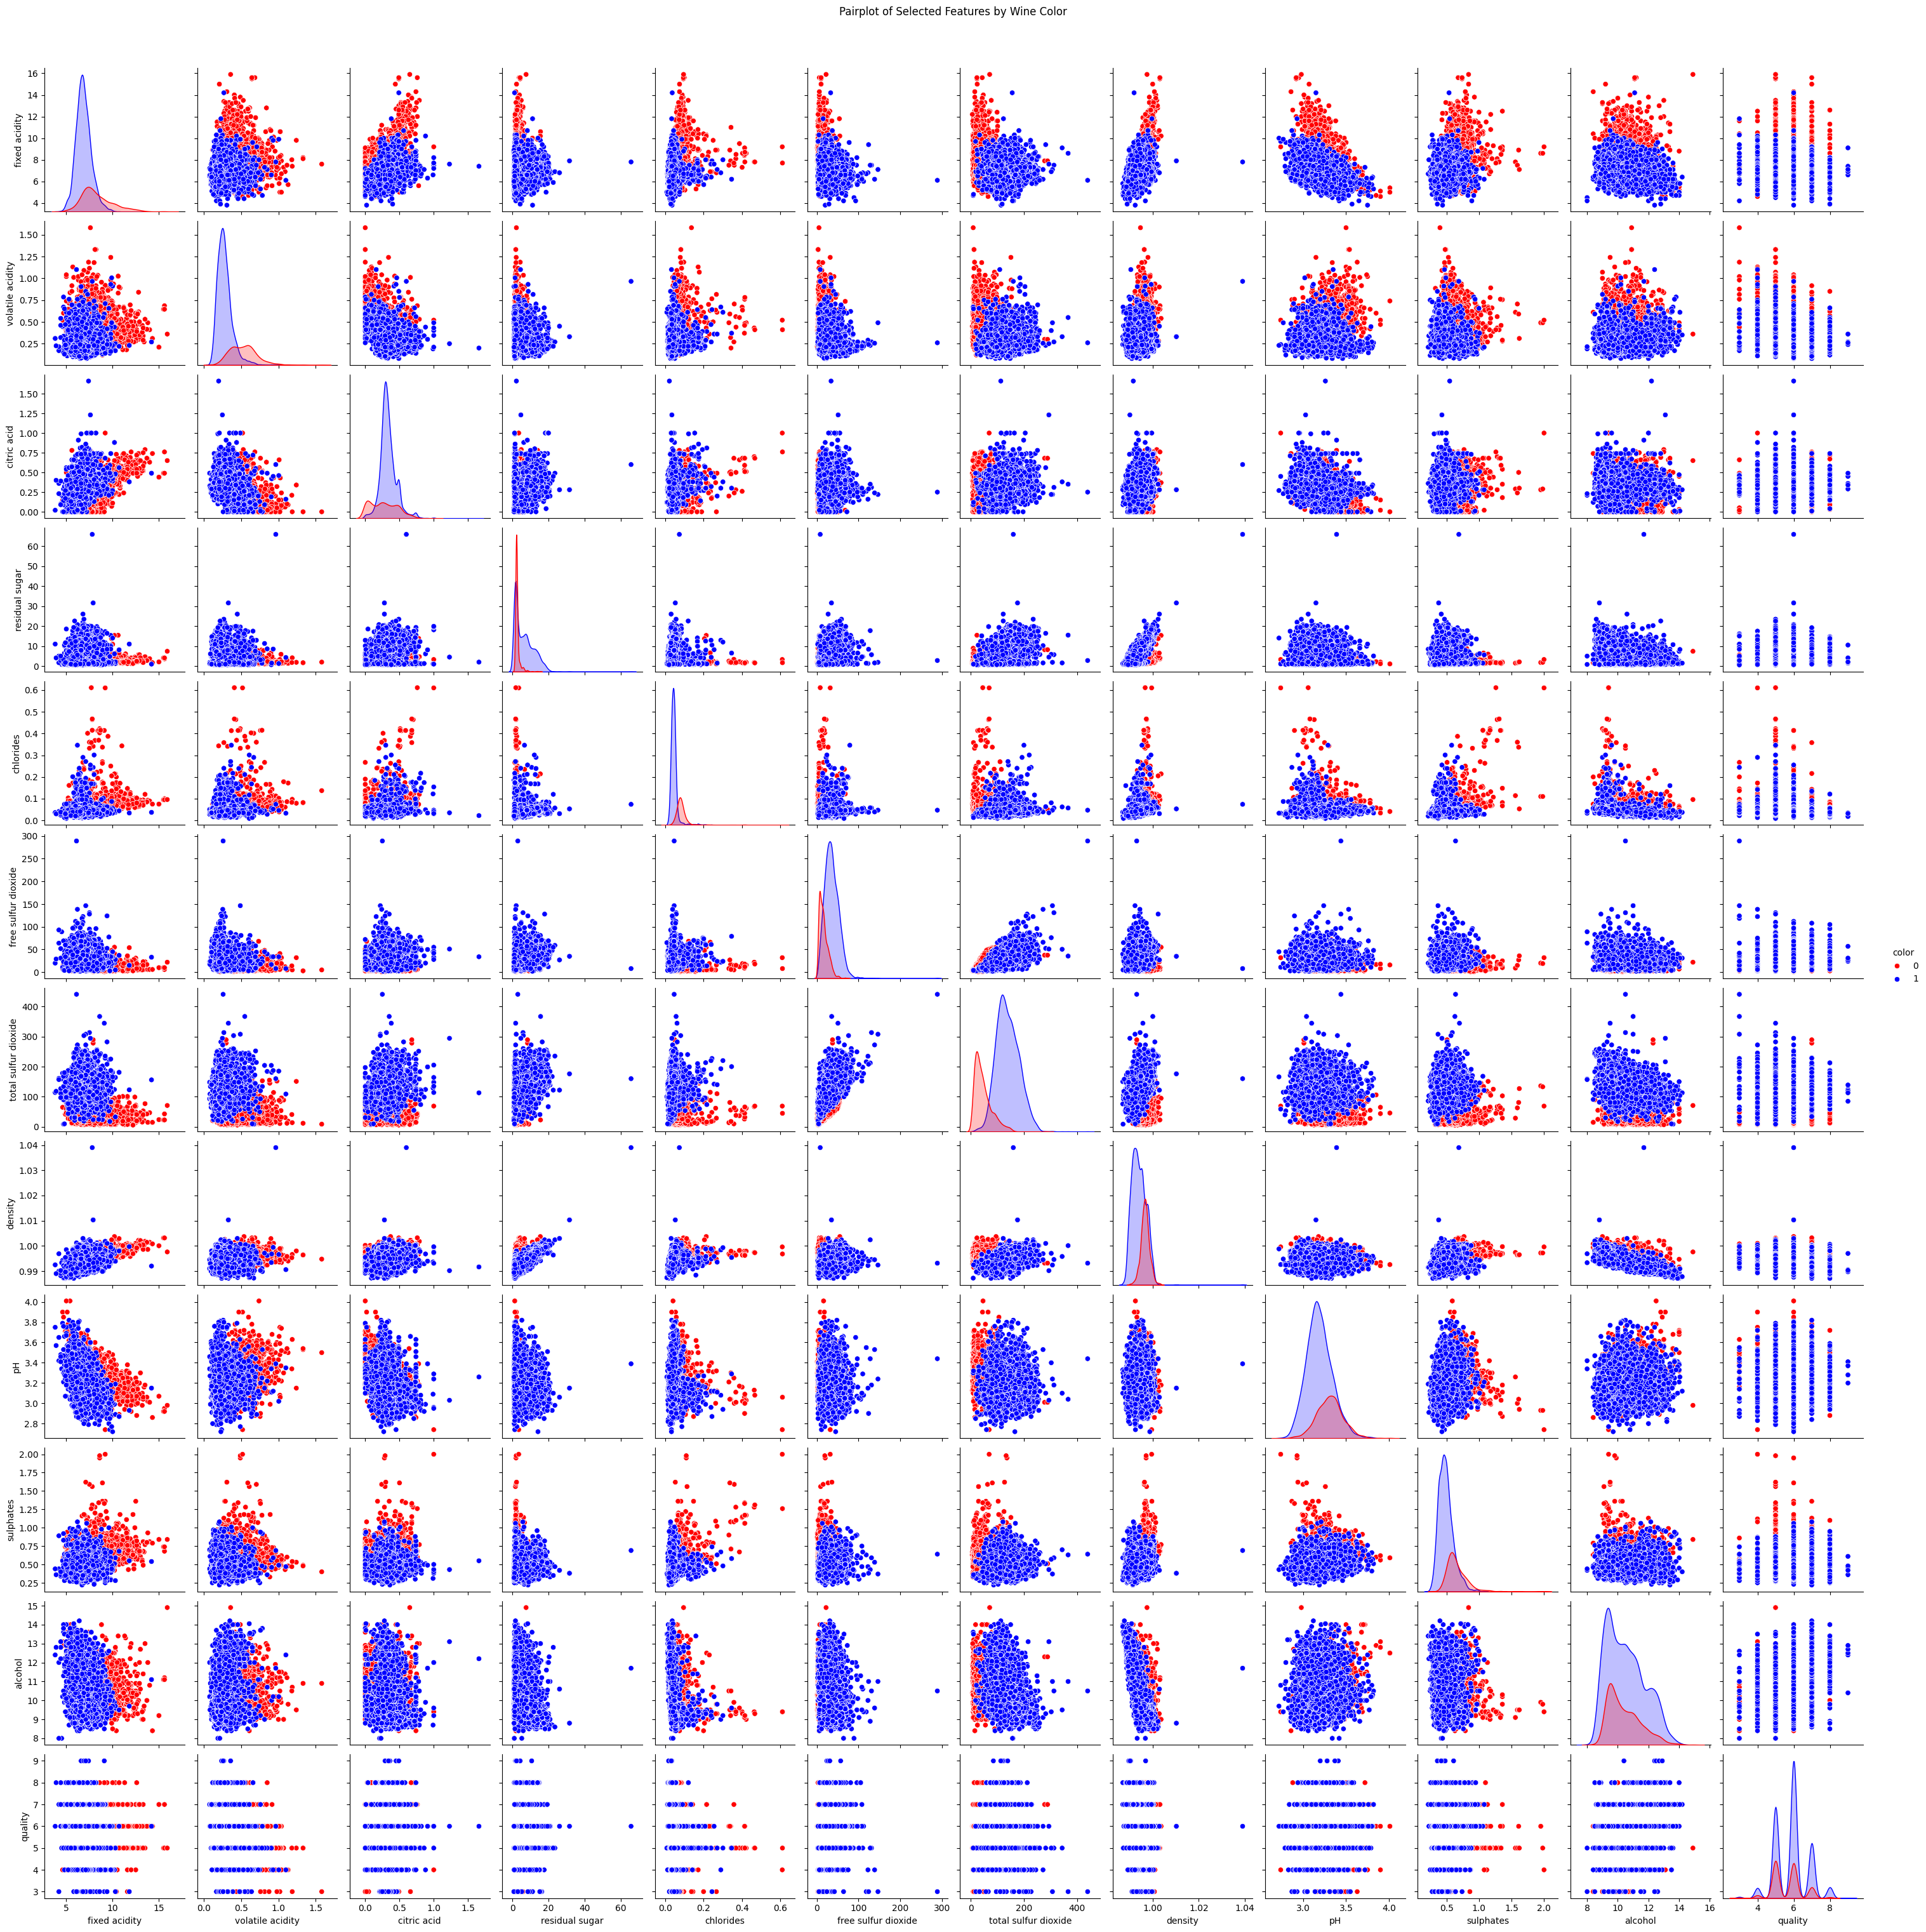

In [28]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
sns.pairplot(wine_df[selected_features+ ['color']], hue='color', palette={0: 'red', 1: 'blue'})
plt.suptitle('Pairplot of Selected Features by Wine Color', y=1.02)
plt.show()

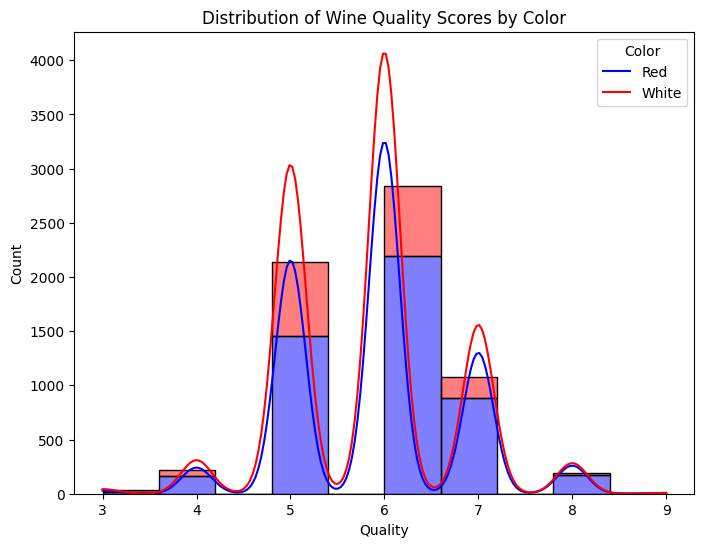

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(data=wine_df, x='quality', hue='color', multiple='stack', bins=10, kde=True,palette={0: 'red', 1: 'blue'})
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Scores by Color')
plt.legend(title='Color', labels=['Red', 'White'])
plt.show()

In [31]:
X = wine_df.drop(['color'], axis=1)
y = wine_df['color']

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [34]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

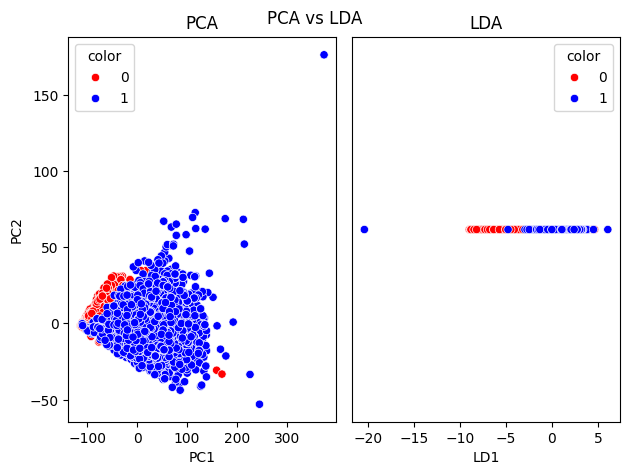

In [39]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette={0: 'red', 1: 'blue'}, legend='full')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_lda[:, 0], y=[0] * len(X_lda), hue=y, palette={0: 'red', 1: 'blue'}, legend='full')
plt.title('LDA')
plt.xlabel('LD1')
plt.yticks([])
plt.tight_layout()

plt.suptitle('PCA vs LDA')
plt.show()

In [42]:
X_cls = wine_df.drop(['color'], axis=1)
y_cls = wine_df['color']

In [43]:
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [46]:
scaler_cls = StandardScaler()
X_cls_train_scaled = scaler_cls.fit_transform(X_cls_train)
X_cls_test_scaled = scaler_cls.transform(X_cls_test)

In [63]:
# PCA
pca_cls = PCA(n_components=2)
X_cls_train_pca = pca_cls.fit_transform(X_cls_train_scaled)
X_cls_test_pca = pca_cls.transform(X_cls_test_scaled)

# LDA
lda_cls = LDA(n_components=1)
X_cls_train_lda = lda_cls.fit_transform(X_cls_train_scaled, y_cls_train)
X_cls_test_lda = lda_cls.transform(X_cls_test_scaled)

# KNN - original
cls_model_original = KNeighborsClassifier()
cls_model_original.fit(X_cls_train_scaled, y_cls_train)

# KNN using PCA Features
cls_model_pca = KNeighborsClassifier()
cls_model_pca.fit(X_cls_train_pca, y_cls_train)

# KNN using LDA Features
cls_model_lda = KNeighborsClassifier()
cls_model_lda.fit(X_cls_train_lda, y_cls_train)

# Classification Evaluation for Original Features
cls_pred_original = cls_model_original.predict(X_cls_test_scaled)
cls_accuracy_original = accuracy_score(y_cls_test, cls_pred_original)

# Classification Evaluation for PCA Features
cls_pred_pca = cls_model_pca.predict(X_cls_test_pca)
cls_accuracy_pca = accuracy_score(y_cls_test, cls_pred_pca)

# Classification Evaluation for LDA Features
cls_pred_lda = cls_model_lda.predict(X_cls_test_lda)
cls_accuracy_lda = accuracy_score(y_cls_test, cls_pred_lda)

print("Accuracy (Original Features):", cls_accuracy_original)
print("Accuracy (PCA Features):", cls_accuracy_pca)
print("Accuracy (LDA Features):", cls_accuracy_lda)

Accuracy (Original Features): 0.9876923076923076
Accuracy (PCA Features): 0.98
Accuracy (LDA Features): 0.9915384615384616


In [67]:
def plot_metrics(model, X, y_true, title):
    # Calculate predictions and probabilities
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    # Plot Confusion Matrix
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - ' + title)

    # Plot ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + title)
    plt.legend()

    plt.tight_layout()
    plt.show()

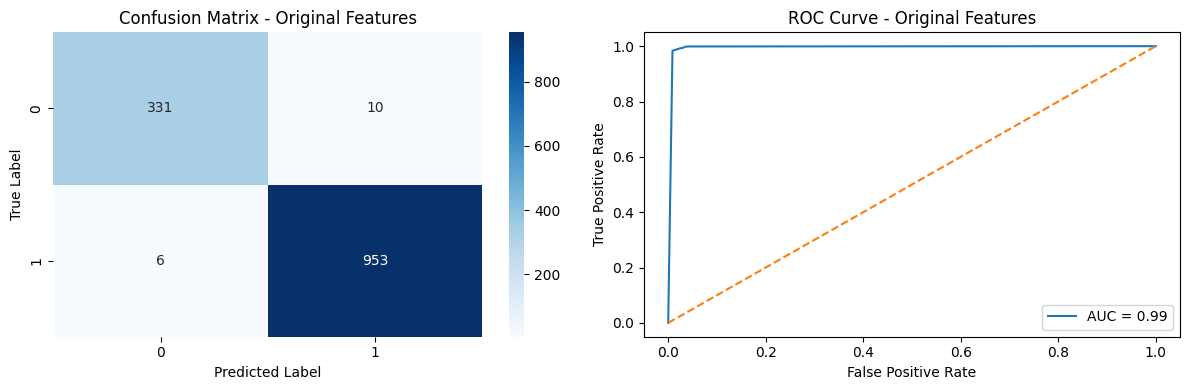

In [68]:
#Plot metrics for Original Features
plot_metrics(cls_model_original, X_cls_test_scaled, y_cls_test, 'Original Features')

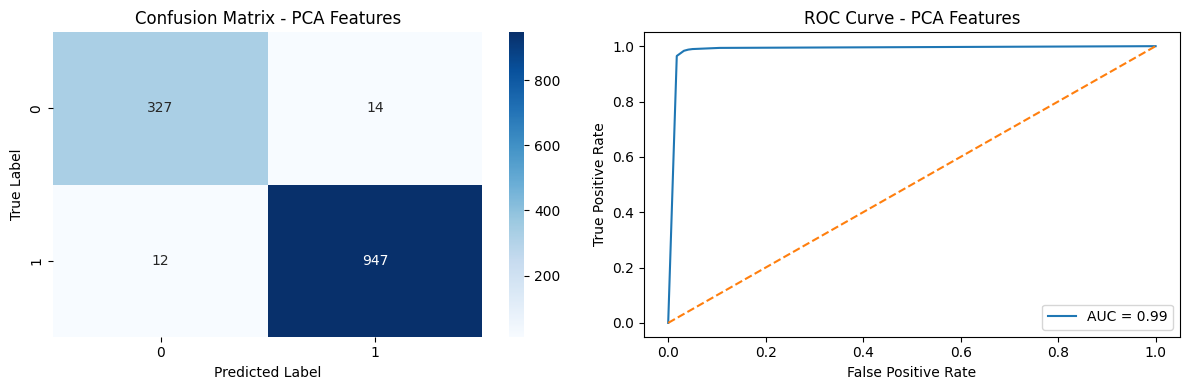

In [69]:
# Plot metrics for PCA Features
plot_metrics(cls_model_pca, X_cls_test_pca, y_cls_test, 'PCA Features')

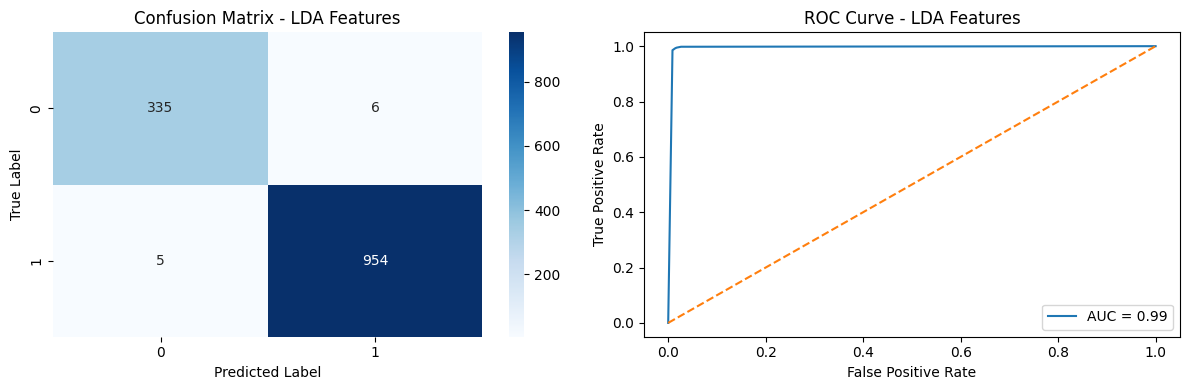

In [82]:
# Plot metrics for LDA Features
plot_metrics(cls_model_lda, X_cls_test_lda, y_cls_test, 'LDA Features')